<a href="https://colab.research.google.com/github/YeimeLeandro/Hyperblog/blob/main/Examen_3_Punto_2_Algebra_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Por favor, carga tu archivo de video:


Saving Los Simpson - ¿No puedes pasar 5 segundos sin humillarte solo.mp4 to Los Simpson - ¿No puedes pasar 5 segundos sin humillarte solo.mp4

Archivo de video cargado: Los Simpson - ¿No puedes pasar 5 segundos sin humillarte solo.mp4

Extrayendo frames del video...
Frame 1 extraído y procesado.
Frame 2 extraído y procesado.
Frame 3 extraído y procesado.
Frame 4 extraído y procesado.
Frame 5 extraído y procesado.
Frame 6 extraído y procesado.
Frame 7 extraído y procesado.
Frame 8 extraído y procesado.
Frame 9 extraído y procesado.
Frame 10 extraído y procesado.
Frame 11 extraído y procesado.
Frame 12 extraído y procesado.
Frame 13 extraído y procesado.
Frame 14 extraído y procesado.
Frame 15 extraído y procesado.
Frame 16 extraído y procesado.
Frame 17 extraído y procesado.
Frame 18 extraído y procesado.
Frame 19 extraído y procesado.
Frame 20 extraído y procesado.
Frame 21 extraído y procesado.
Frame 22 extraído y procesado.
Frame 23 extraído y procesado.
Frame 24 extraído y procesado

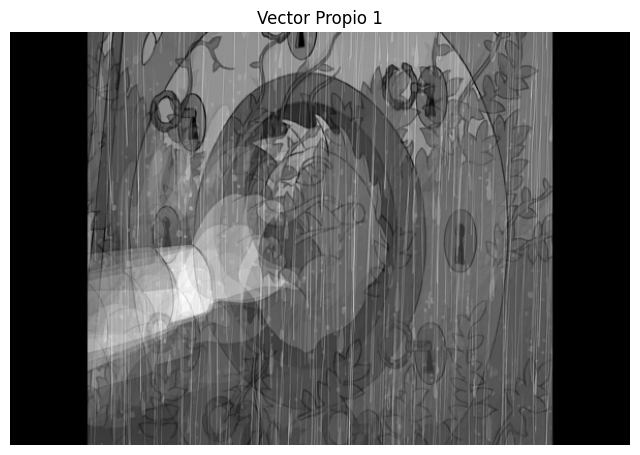

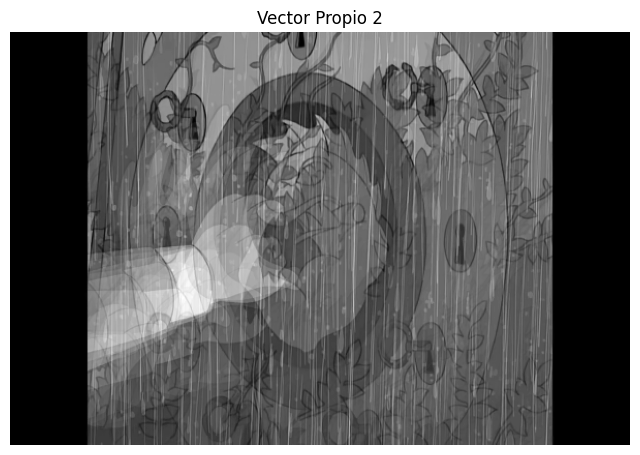

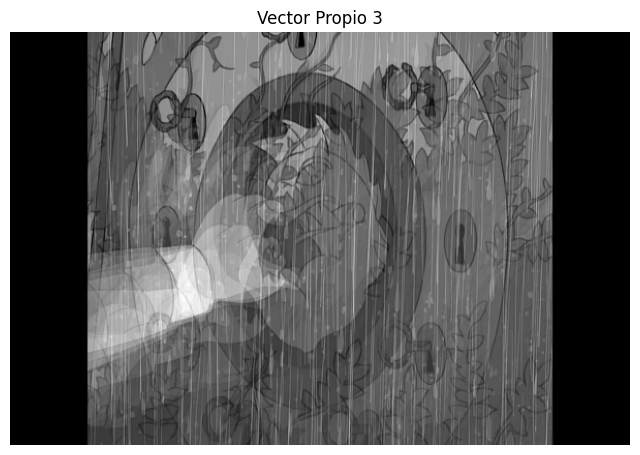

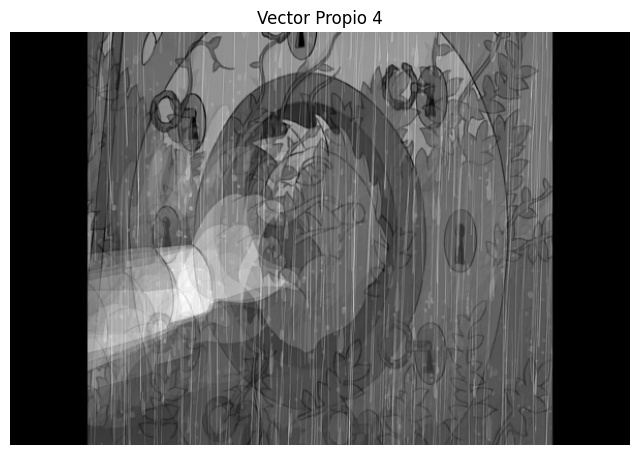

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Paso 1: Cargar el archivo de video
print("Por favor, carga tu archivo de video:")
uploaded = files.upload()

# Obtener el nombre del archivo cargado
video_path = next(iter(uploaded))
print(f"\nArchivo de video cargado: {video_path}")

# Abrir el archivo de video
cap = cv2.VideoCapture(video_path)

# Verificar si el video se ha abierto correctamente
if not cap.isOpened():
    print("Error al abrir el video. Por favor, verifica el formato del archivo.")
    exit()

# Variables iniciales
frame_count = 0
frames = []

print("\nExtrayendo frames del video...")

# Leer frames del video
while frame_count < 30:
    ret, frame = cap.read()
    if not ret:
        print(f"Fin del video o error al leer el frame {frame_count}.")
        break  # Fin del video o error al leer
    # Convertir a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Redimensionar a 400x600 (altura x ancho)
    gray_resized = cv2.resize(gray, (600, 400))
    frames.append(gray_resized)
    frame_count += 1
    print(f"Frame {frame_count} extraído y procesado.")

cap.release()

# Verificar si se obtuvieron suficientes frames
if len(frames) < 30:
    print("\nNo se pudieron extraer 30 imágenes del video. Por favor, utiliza un video más largo.")
    exit()

print("\nFrames extraídos exitosamente.")

# Aplanar cada imagen y apilarlas como columnas en H
H = np.array([frame.flatten() for frame in frames]).T  # Tamaño: (240000, 30)
print(f"\nMatriz H creada con dimensiones: {H.shape}")
print(f"Primeros 5 elementos de la primera columna de H:\n{H[:5, 0]}")

# Calcular la imagen promedio
H_mean = np.mean(H, axis=1, keepdims=True)  # Promedio sobre las columnas
print(f"\nImagen promedio H_mean calculada con dimensiones: {H_mean.shape}")
print(f"Primeros 5 elementos de H_mean:\n{H_mean[:5, 0]}")

# Substraer la imagen promedio de cada imagen
A = H - H_mean  # Tamaño: (240000, 30)
print(f"\nMatriz A (H - H_mean) calculada con dimensiones: {A.shape}")
print(f"Primeros 5 elementos de la primera columna de A:\n{A[:5, 0]}")

# Calcular AtA
AtA = np.dot(A.T, A)  # Tamaño: (30, 30)
print(f"\nMatriz AtA calculada con dimensiones: {AtA.shape}")
print(f"Primeros 5 elementos de la primera fila de AtA:\n{AtA[0, :5]}")

# Calcular los valores y vectores propios de AtA
eigvals, eigvecs = np.linalg.eigh(AtA)  # eigh porque AtA es simétrica

# Ordenar los valores y vectores propios en orden descendente
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print(f"\nValores propios calculados (ordenados de mayor a menor):\n{eigvals}")
print(f"\nVectores propios asociados (primeros 5 vectores):\n{eigvecs[:, :5]}")

# Filtrar los valores propios no nulos (mayores que un umbral pequeño)
non_zero_indices = np.where(eigvals > 1e-10)[0]
eigvals_non_zero = eigvals[non_zero_indices]
eigvecs_non_zero = eigvecs[:, non_zero_indices]

# Verificar si hay suficientes valores propios no nulos
if len(eigvals_non_zero) < 2:
    print("\nNo hay suficientes valores propios no nulos para continuar con el análisis.")
    exit()

print(f"\nValores propios no nulos (mayores que 1e-10):\n{eigvals_non_zero}")

# Seleccionar los dos valores propios mayores y menores
largest_indices = [0, 1]
smallest_indices = [-2, -1]  # Últimos dos valores no nulos

selected_indices = largest_indices + smallest_indices
selected_eigvals = eigvals_non_zero[selected_indices]
selected_eigvecs = eigvecs_non_zero[:, selected_indices]

print(f"\nÍndices de los valores propios seleccionados: {selected_indices}")
print(f"Valores propios seleccionados:\n{selected_eigvals}")

# Calcular los vectores propios de AAt
U = np.dot(A, selected_eigvecs)
print(f"\nMatriz U calculada con dimensiones: {U.shape}")
print(f"Primeros 5 elementos de la primera columna de U:\n{U[:5, 0]}")

# Normalizar los vectores propios
for i in range(U.shape[1]):
    norm = np.linalg.norm(U[:, i])
    U[:, i] /= norm
    print(f"Vector propio {i+1} normalizado (norma = {norm})")

# Representar los vectores propios como imágenes
for i in range(U.shape[1]):
    # Reconstruir la imagen del vector propio
    eigenvector_image = U[:, i].reshape(400, 600)
    # Añadir la imagen promedio
    reconstructed_image = eigenvector_image + H_mean.reshape(400, 600)
    # Normalizar la imagen para visualización
    reconstructed_image -= reconstructed_image.min()
    reconstructed_image /= reconstructed_image.max()
    reconstructed_image *= 255
    reconstructed_image = reconstructed_image.astype(np.uint8)
    # Mostrar la imagen
    plt.figure(figsize=(8, 6))
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Vector Propio {i+1}')
    plt.axis('off')
    plt.show()


Por favor, carga tu archivo de video:


Saving Los Simpson - ¿No puedes pasar 5 segundos sin humillarte solo.mp4 to Los Simpson - ¿No puedes pasar 5 segundos sin humillarte solo (1).mp4

Archivo de video cargado: Los Simpson - ¿No puedes pasar 5 segundos sin humillarte solo (1).mp4

Extrayendo frames del video...
Frame 1 extraído y procesado.
Frame 2 extraído y procesado.
Frame 3 extraído y procesado.
Frame 4 extraído y procesado.
Frame 5 extraído y procesado.
Frame 6 extraído y procesado.
Frame 7 extraído y procesado.
Frame 8 extraído y procesado.
Frame 9 extraído y procesado.
Frame 10 extraído y procesado.
Frame 11 extraído y procesado.
Frame 12 extraído y procesado.
Frame 13 extraído y procesado.
Frame 14 extraído y procesado.
Frame 15 extraído y procesado.
Frame 16 extraído y procesado.
Frame 17 extraído y procesado.
Frame 18 extraído y procesado.
Frame 19 extraído y procesado.
Frame 20 extraído y procesado.
Frame 21 extraído y procesado.
Frame 22 extraído y procesado.
Frame 23 extraído y procesado.
Frame 24 extraído y p

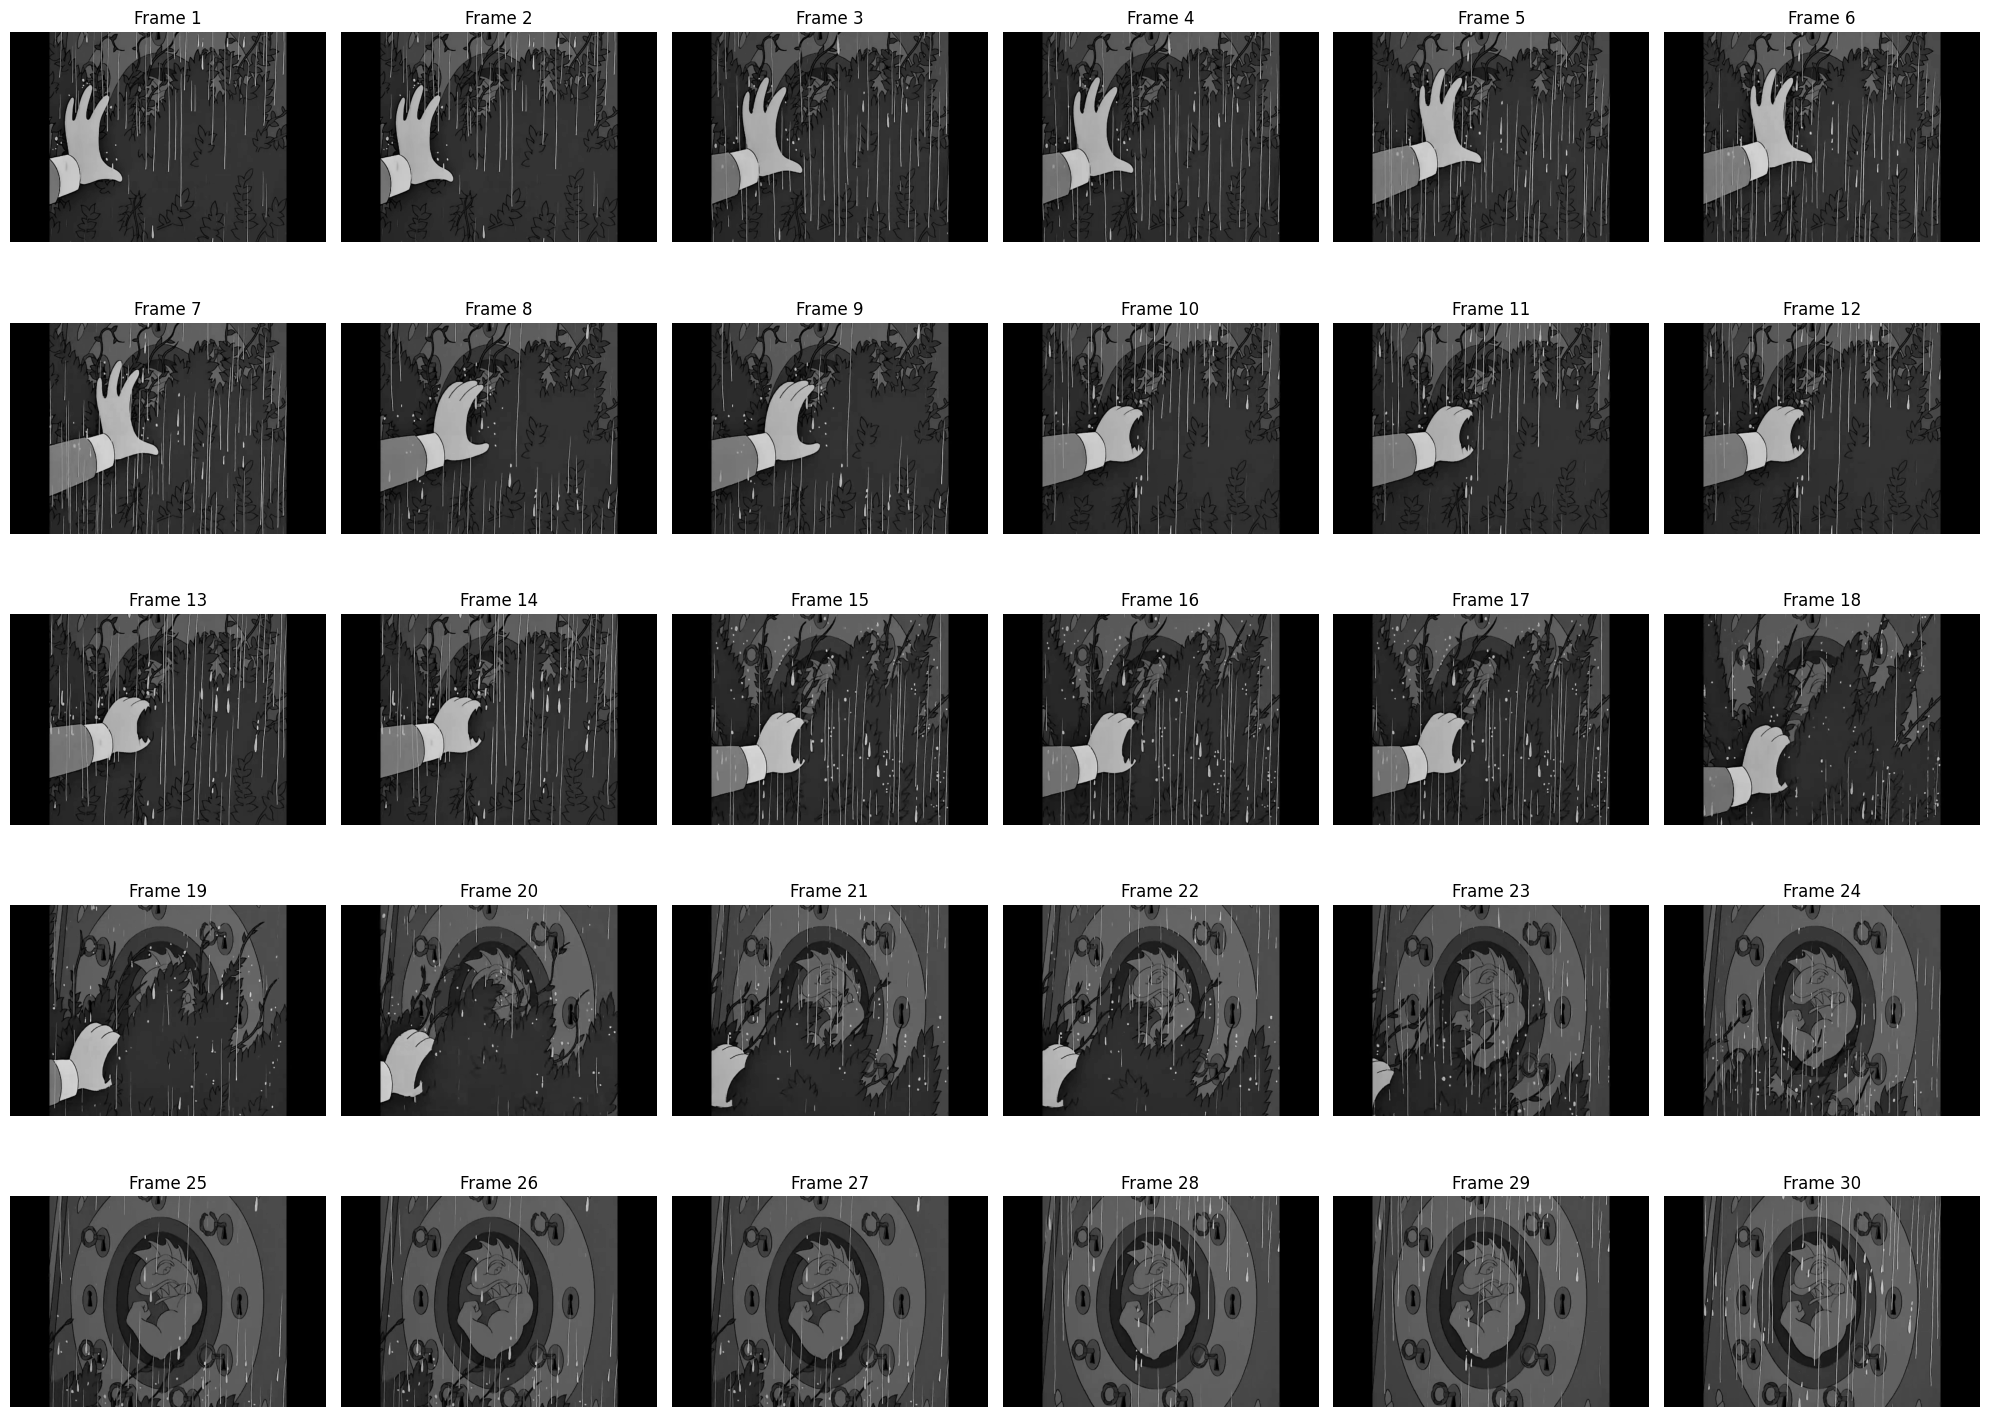


Matriz H creada con dimensiones: (240000, 30)
Primeros 5 elementos de la primera columna de H:
[0 0 0 0 0]

Imagen promedio H_mean calculada con dimensiones: (240000, 1)
Primeros 5 elementos de H_mean:
[0. 0. 0. 0. 0.]

Matriz A (H - H_mean) calculada con dimensiones: (240000, 30)
Primeros 5 elementos de la primera columna de A:
[0. 0. 0. 0. 0.]

Matriz AtA calculada con dimensiones: (30, 30)
Primeros 5 elementos de la primera fila de AtA:
[ 2.28396198e+08  2.28396198e+08  3.05139660e+07  2.98008749e+07
 -2.67690415e+07]

Valores propios calculados (ordenados de mayor a menor):
[ 1.40795142e+09  8.34247240e+08  6.55335142e+08  6.36001765e+08
  4.34238124e+08  3.82815079e+08  3.41118116e+08  3.12154144e+08
  2.26513648e+08  1.47351220e+08  1.01052558e+08  9.09051831e+07
  7.53208832e+07  5.99881721e+07  2.13219240e+07  1.39765424e+06
  1.22094513e+06  1.16704860e+06  1.08121070e+06  8.51865197e+05
  5.85105048e+05  2.84321995e+05  2.77891198e+05  1.74618347e+05
  1.14420249e+05  3.4613

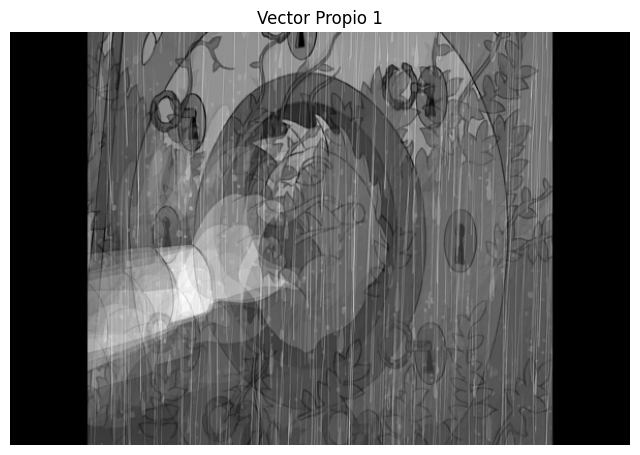

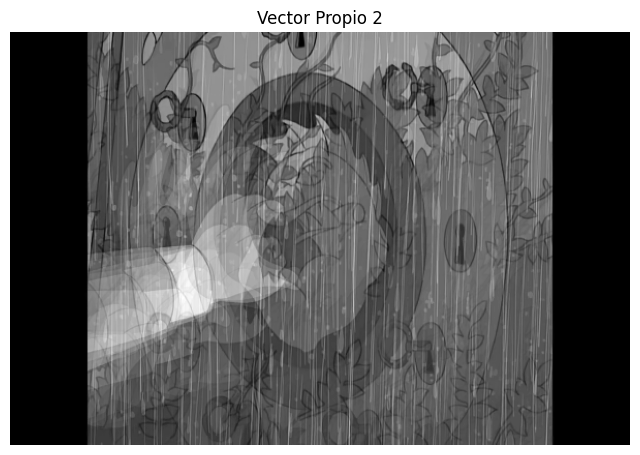

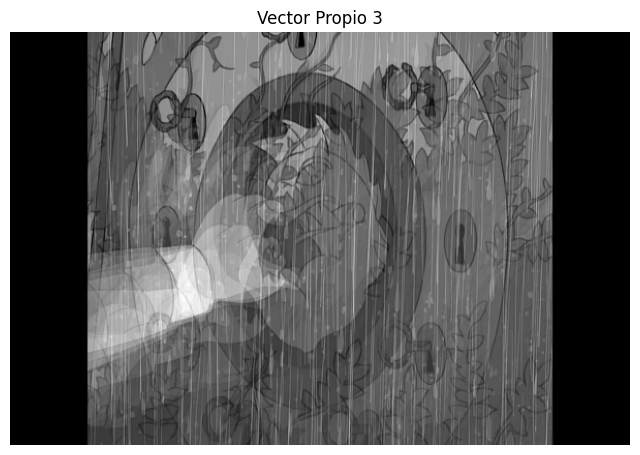

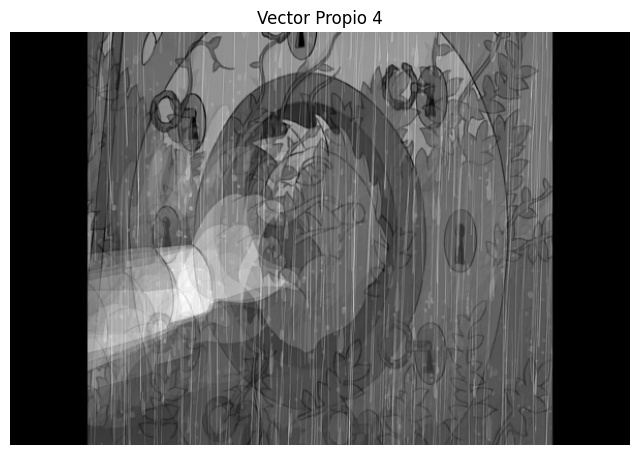

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Paso 1: Cargar el archivo de video
print("Por favor, carga tu archivo de video:")
uploaded = files.upload()

# Obtener el nombre del archivo cargado
video_path = next(iter(uploaded))
print(f"\nArchivo de video cargado: {video_path}")

# Abrir el archivo de video
cap = cv2.VideoCapture(video_path)

# Verificar si el video se ha abierto correctamente
if not cap.isOpened():
    print("Error al abrir el video. Por favor, verifica el formato del archivo.")
    exit()

# Variables iniciales
frame_count = 0
frames = []

print("\nExtrayendo frames del video...")

# Leer frames del video
while frame_count < 30:
    ret, frame = cap.read()
    if not ret:
        print(f"Fin del video o error al leer el frame {frame_count}.")
        break  # Fin del video o error al leer
    # Convertir a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Redimensionar a 400x600 (altura x ancho)
    gray_resized = cv2.resize(gray, (600, 400))
    frames.append(gray_resized)
    frame_count += 1
    print(f"Frame {frame_count} extraído y procesado.")

cap.release()

# Verificar si se obtuvieron suficientes frames
if len(frames) < 30:
    print("\nNo se pudieron extraer 30 imágenes del video. Por favor, utiliza un video más largo.")
    exit()

print("\nFrames extraídos exitosamente.")

# Mostrar los 30 frames extraídos
print("\nMostrando los 30 frames extraídos:")
fig, axes = plt.subplots(5, 6, figsize=(20, 15))
axes = axes.ravel()  # Convertir la matriz 2D de ejes en 1D para iterar fácilmente

for i in range(30):
    axes[i].imshow(frames[i], cmap='gray')
    axes[i].set_title(f'Frame {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Aplanar cada imagen y apilarlas como columnas en H
H = np.array([frame.flatten() for frame in frames]).T  # Tamaño: (240000, 30)
print(f"\nMatriz H creada con dimensiones: {H.shape}")
print(f"Primeros 5 elementos de la primera columna de H:\n{H[:5, 0]}")

# Calcular la imagen promedio
H_mean = np.mean(H, axis=1, keepdims=True)  # Promedio sobre las columnas
print(f"\nImagen promedio H_mean calculada con dimensiones: {H_mean.shape}")
print(f"Primeros 5 elementos de H_mean:\n{H_mean[:5, 0]}")

# Substraer la imagen promedio de cada imagen
A = H - H_mean  # Tamaño: (240000, 30)
print(f"\nMatriz A (H - H_mean) calculada con dimensiones: {A.shape}")
print(f"Primeros 5 elementos de la primera columna de A:\n{A[:5, 0]}")

# Calcular AtA
AtA = np.dot(A.T, A)  # Tamaño: (30, 30)
print(f"\nMatriz AtA calculada con dimensiones: {AtA.shape}")
print(f"Primeros 5 elementos de la primera fila de AtA:\n{AtA[0, :5]}")

# Calcular los valores y vectores propios de AtA
eigvals, eigvecs = np.linalg.eigh(AtA)  # eigh porque AtA es simétrica

# Ordenar los valores y vectores propios en orden descendente
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print(f"\nValores propios calculados (ordenados de mayor a menor):\n{eigvals}")
print(f"\nVectores propios asociados (primeros 5 vectores):\n{eigvecs[:, :5]}")

# Filtrar los valores propios no nulos (mayores que un umbral pequeño)
non_zero_indices = np.where(eigvals > 1e-10)[0]
eigvals_non_zero = eigvals[non_zero_indices]
eigvecs_non_zero = eigvecs[:, non_zero_indices]

# Verificar si hay suficientes valores propios no nulos
if len(eigvals_non_zero) < 2:
    print("\nNo hay suficientes valores propios no nulos para continuar con el análisis.")
    exit()

print(f"\nValores propios no nulos (mayores que 1e-10):\n{eigvals_non_zero}")

# Seleccionar los dos valores propios mayores y menores
largest_indices = [0, 1]
smallest_indices = [-2, -1]  # Últimos dos valores no nulos

selected_indices = largest_indices + smallest_indices
selected_eigvals = eigvals_non_zero[selected_indices]
selected_eigvecs = eigvecs_non_zero[:, selected_indices]

print(f"\nÍndices de los valores propios seleccionados: {selected_indices}")
print(f"Valores propios seleccionados:\n{selected_eigvals}")

# Calcular los vectores propios de AAt
U = np.dot(A, selected_eigvecs)
print(f"\nMatriz U calculada con dimensiones: {U.shape}")
print(f"Primeros 5 elementos de la primera columna de U:\n{U[:5, 0]}")

# Normalizar los vectores propios
for i in range(U.shape[1]):
    norm = np.linalg.norm(U[:, i])
    U[:, i] /= norm
    print(f"Vector propio {i+1} normalizado (norma = {norm})")

# Representar los vectores propios como imágenes
for i in range(U.shape[1]):
    # Reconstruir la imagen del vector propio
    eigenvector_image = U[:, i].reshape(400, 600)
    # Añadir la imagen promedio
    reconstructed_image = eigenvector_image + H_mean.reshape(400, 600)
    # Normalizar la imagen para visualización
    reconstructed_image -= reconstructed_image.min()
    reconstructed_image /= reconstructed_image.max()
    reconstructed_image *= 255
    reconstructed_image = reconstructed_image.astype(np.uint8)
    # Mostrar la imagen
    plt.figure(figsize=(8, 6))
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Vector Propio {i+1}')
    plt.axis('off')
    plt.show()
